# Importing Libraries

In [3]:
#importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics 

# Reading the data from CSV file 

In [5]:
data = pd.read_csv("indian_liver_patient.csv")

In [247]:
data['Dataset'].value_counts()

0    416
1    167
Name: Dataset, dtype: int64

# Exploratory Data Analysis 

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [8]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [9]:
#encoding the values of 'dataset' into 0 and 1 from 1 and 2
data['Dataset'] = data['Dataset'].apply(lambda x : 1 if x == 2 else 0)

In [10]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,0


# Data Visualisation 

# Plotting the number of patients with liver disease and non liver disease

Number of patients with liver disease:  416
Number of patients without liver disease:  167
'0' represents the number of patients with liver disease.
'1' represents the number of patients who doesnt have liver disease.


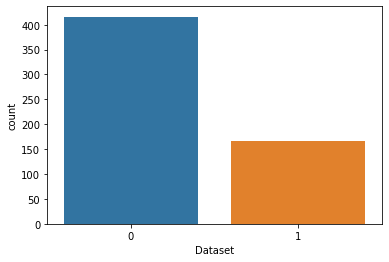

In [11]:
# Plotting the number of patients with liver disease and non liver disease
sns.countplot(data = data, x = 'Dataset', label = 'count')
LiverDisease_Count, Non_LiverDisease_Count = data['Dataset'].value_counts()
print('Number of patients with liver disease: ', LiverDisease_Count)
print('Number of patients without liver disease: ', Non_LiverDisease_Count)
print("'0' represents the number of patients with liver disease.")
print("'1' represents the number of patients who doesnt have liver disease.")

# Plotting the total number of male and female patients 

Number of female patients:  142
Number of male patients:  441
'0' represents the number of female patients.
'1' represents the number of male patients.


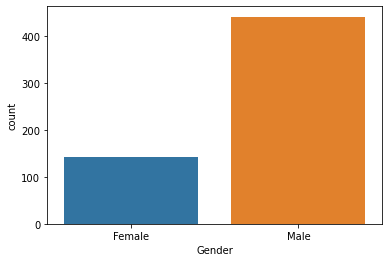

In [12]:
#Plotting the total number of male and female patients 
sns.countplot(data = data, x = 'Gender', label = 'Count')
Male, Female = data['Gender'].value_counts()
print("Number of female patients: ",  Female)
print("Number of male patients: ", Male)
print("'0' represents the number of female patients.")
print("'1' represents the number of male patients.")

# Number of liver patient / non patient according to Gender

'0' is marked in blue represents the number of patients with liver disease in each category.
'1' is markd in orange represents the number of patients who doesnt have liver disease in each category.


D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


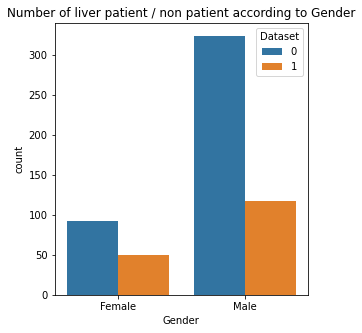

In [13]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
sns.countplot('Gender', hue = 'Dataset', data = data)
plt.title("Number of liver patient / non patient according to Gender")
print("'0' is marked in blue represents the number of patients with liver disease in each category.")
print("'1' is markd in orange represents the number of patients who doesnt have liver disease in each category.")

# Distribution of Total Bilirubin

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Bilirubin', ylabel='Density'>

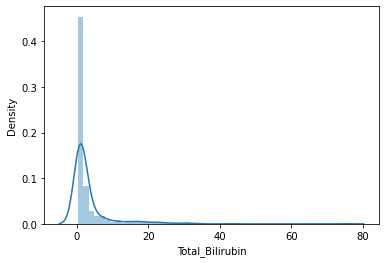

In [14]:
sns.distplot(data['Total_Bilirubin'])

# Distribution of Direct Billirubin

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Direct_Bilirubin', ylabel='Density'>

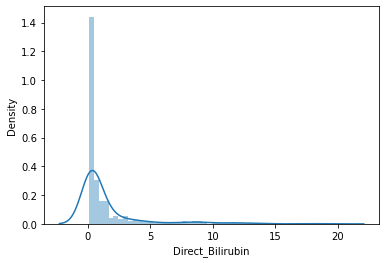

In [15]:
sns.distplot(data['Direct_Bilirubin'])

# Distribution of Alkaline_Phosphotase

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alkaline_Phosphotase', ylabel='Density'>

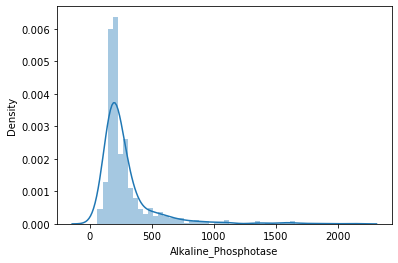

In [6]:
sns.distplot(data['Alkaline_Phosphotase'])

# Distribution of Alamine_Aminotransferase

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alamine_Aminotransferase', ylabel='Density'>

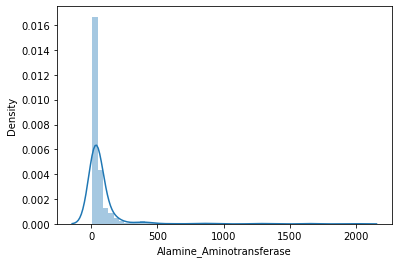

In [17]:
sns.distplot(data['Alamine_Aminotransferase'])

# Distribution of Total_Protiens

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Protiens', ylabel='Density'>

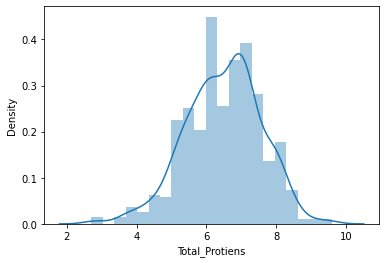

In [18]:
sns.distplot(data['Total_Protiens'])

# Distribution of Albumin

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Albumin', ylabel='Density'>

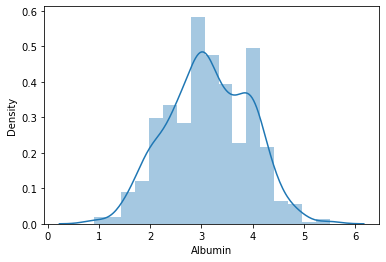

In [19]:
sns.distplot(data['Albumin'])

# Distribution of Albumin_and_Globulin_Ratio

D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio', ylabel='Density'>

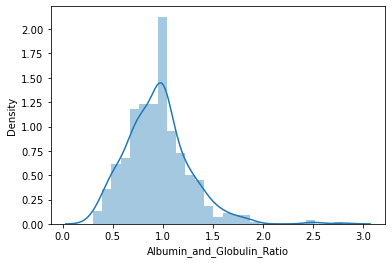

In [20]:
sns.distplot(data['Albumin_and_Globulin_Ratio'])

# Plotting Gender(Male/Female) with Total_Bilirubin and Direct_Bilirubin

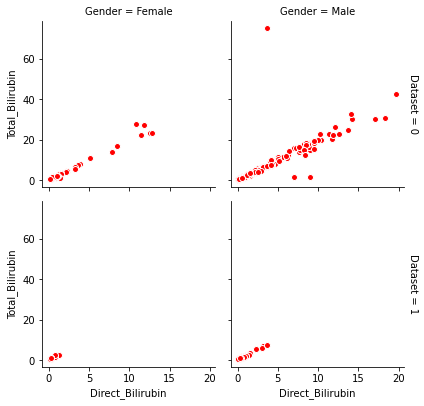

In [21]:
# Plotting Gender(Male/Female) along with Total_Bilirubin and Direct_Bilirubin
g = sns.FacetGrid(data, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", color = 'r',edgecolor="w")
plt.subplots_adjust(top=0.9)

# Joint plot of Total Billiribin vs Direct Billirubin

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


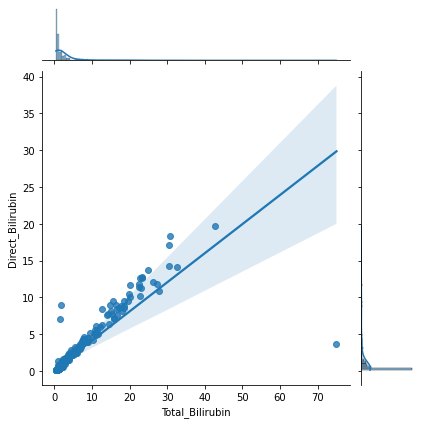

In [22]:
sns.jointplot('Total_Bilirubin', 'Direct_Bilirubin', data = data, kind = 'reg')

# Plotting Gender(Male/Female) with Aspartate Aminotransferase and Alamine Aminotransferase

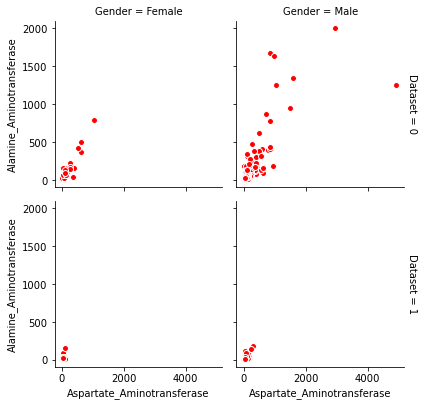

In [23]:
# Plotting Gender(Male/Female) along with Aspartate Aminotransferase, Alamine Aminotransferase
g = sns.FacetGrid(data, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase", color = 'r', edgecolor="w")
plt.subplots_adjust(top=0.9)

# Jointplot of Aspartate_Aminotransferase and Alamine_Aminotransferase

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


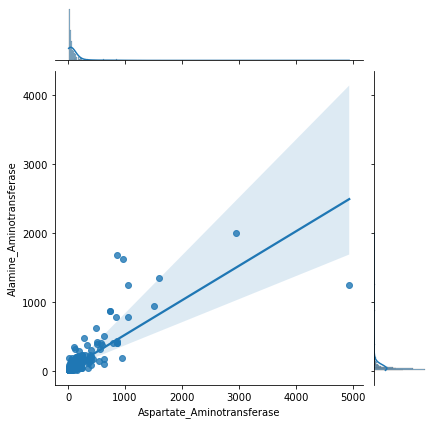

In [24]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data = data, kind = 'reg')

# Plotting Gender(Male/Female) with Alkaline_Phosphotase and Alamine_Aminotransferase

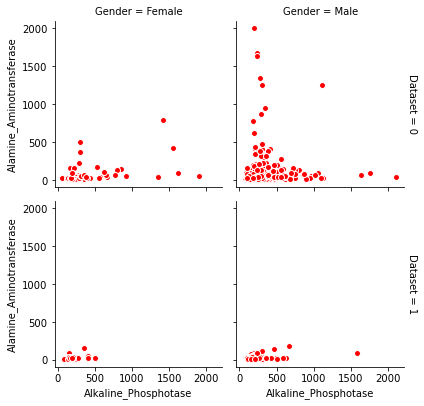

In [25]:
# Plotting Gender(Male/Female) along with Alkaline_Phosphotase and Alamine_Aminotransferase
g = sns.FacetGrid(data, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase", color = 'r', edgecolor="w")
plt.subplots_adjust(top=0.9)

# Joint Plot of Alkaline_Phosphotase and Alamine_Aminotransferase

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


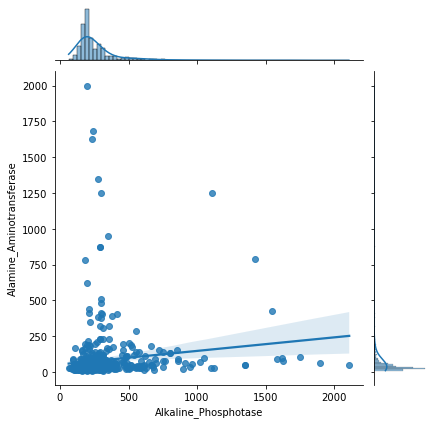

In [26]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data = data, kind = 'reg')

# Plotting Gender(Male/Female) with Alkaline_Phosphotase and Aspartate Aminotransferase

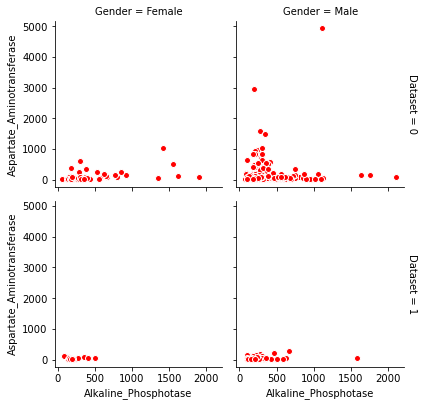

In [27]:
# Plotting Gender(Male/Female) along with Alkaline_Phosphotase and Aspartate Aminotransferase
g = sns.FacetGrid(data, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Aspartate_Aminotransferase", color = 'r', edgecolor="w")
plt.subplots_adjust(top=0.9)

# Joint Plot of Alkaline_Phosphotase and Aspartate Aminotransferase

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


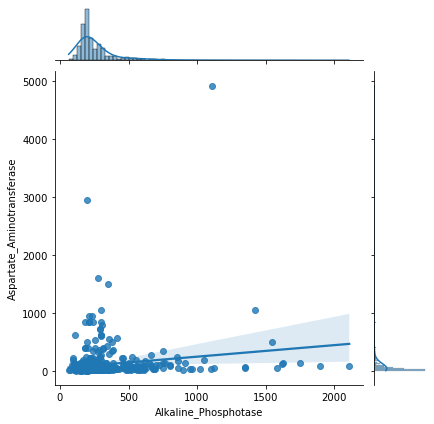

In [28]:
sns.jointplot("Alkaline_Phosphotase", "Aspartate_Aminotransferase", data = data, kind = 'reg')

# Plotting Gender (Male / Female) with Total Proteins and Albumin 

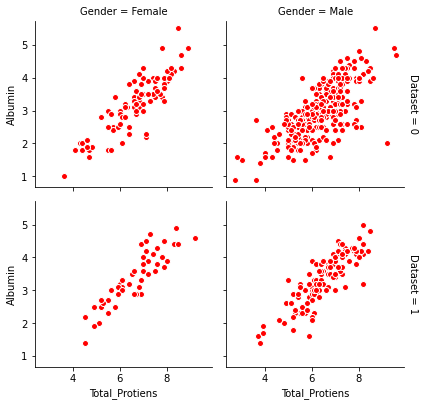

In [29]:
# Plotting Gender(Male/Female) along with Total_Protiens and Albumin
g = sns.FacetGrid(data, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w", color = 'r')
plt.subplots_adjust(top=0.9)

# Joint plot of TotalProtein vs Albumin

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


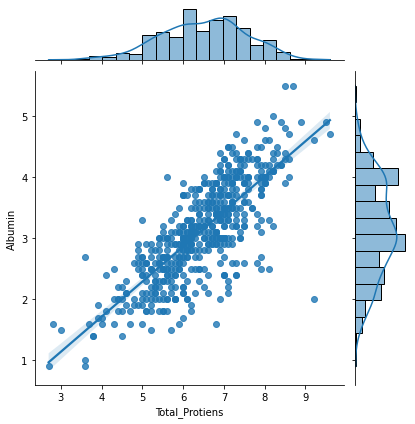

In [30]:
sns.jointplot("Total_Protiens", "Albumin", data=data, kind="reg")

# Plotting Gender (Male / Female) with Albumin and Globulin

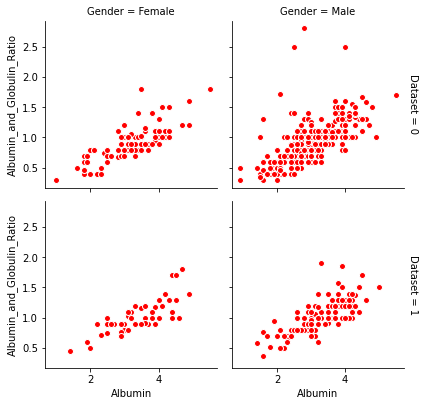

In [31]:
# Plotting Gender(Male/Female) along with Albumin and Albumin_and_Globulin_Ratio
g = sns.FacetGrid(data, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w", color = 'r')
plt.subplots_adjust(top=0.9)

# Joint Plot of Albumin vs Globulin 

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


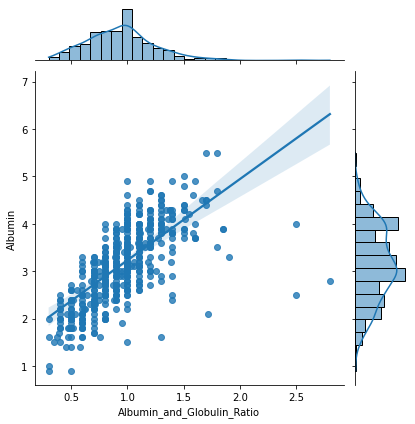

In [32]:
# Plotting Albumin vs Albumin_and_Globulin_Ratio
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=data, kind="reg")

# Pair plot of the Data

<Figure size 648x648 with 0 Axes>

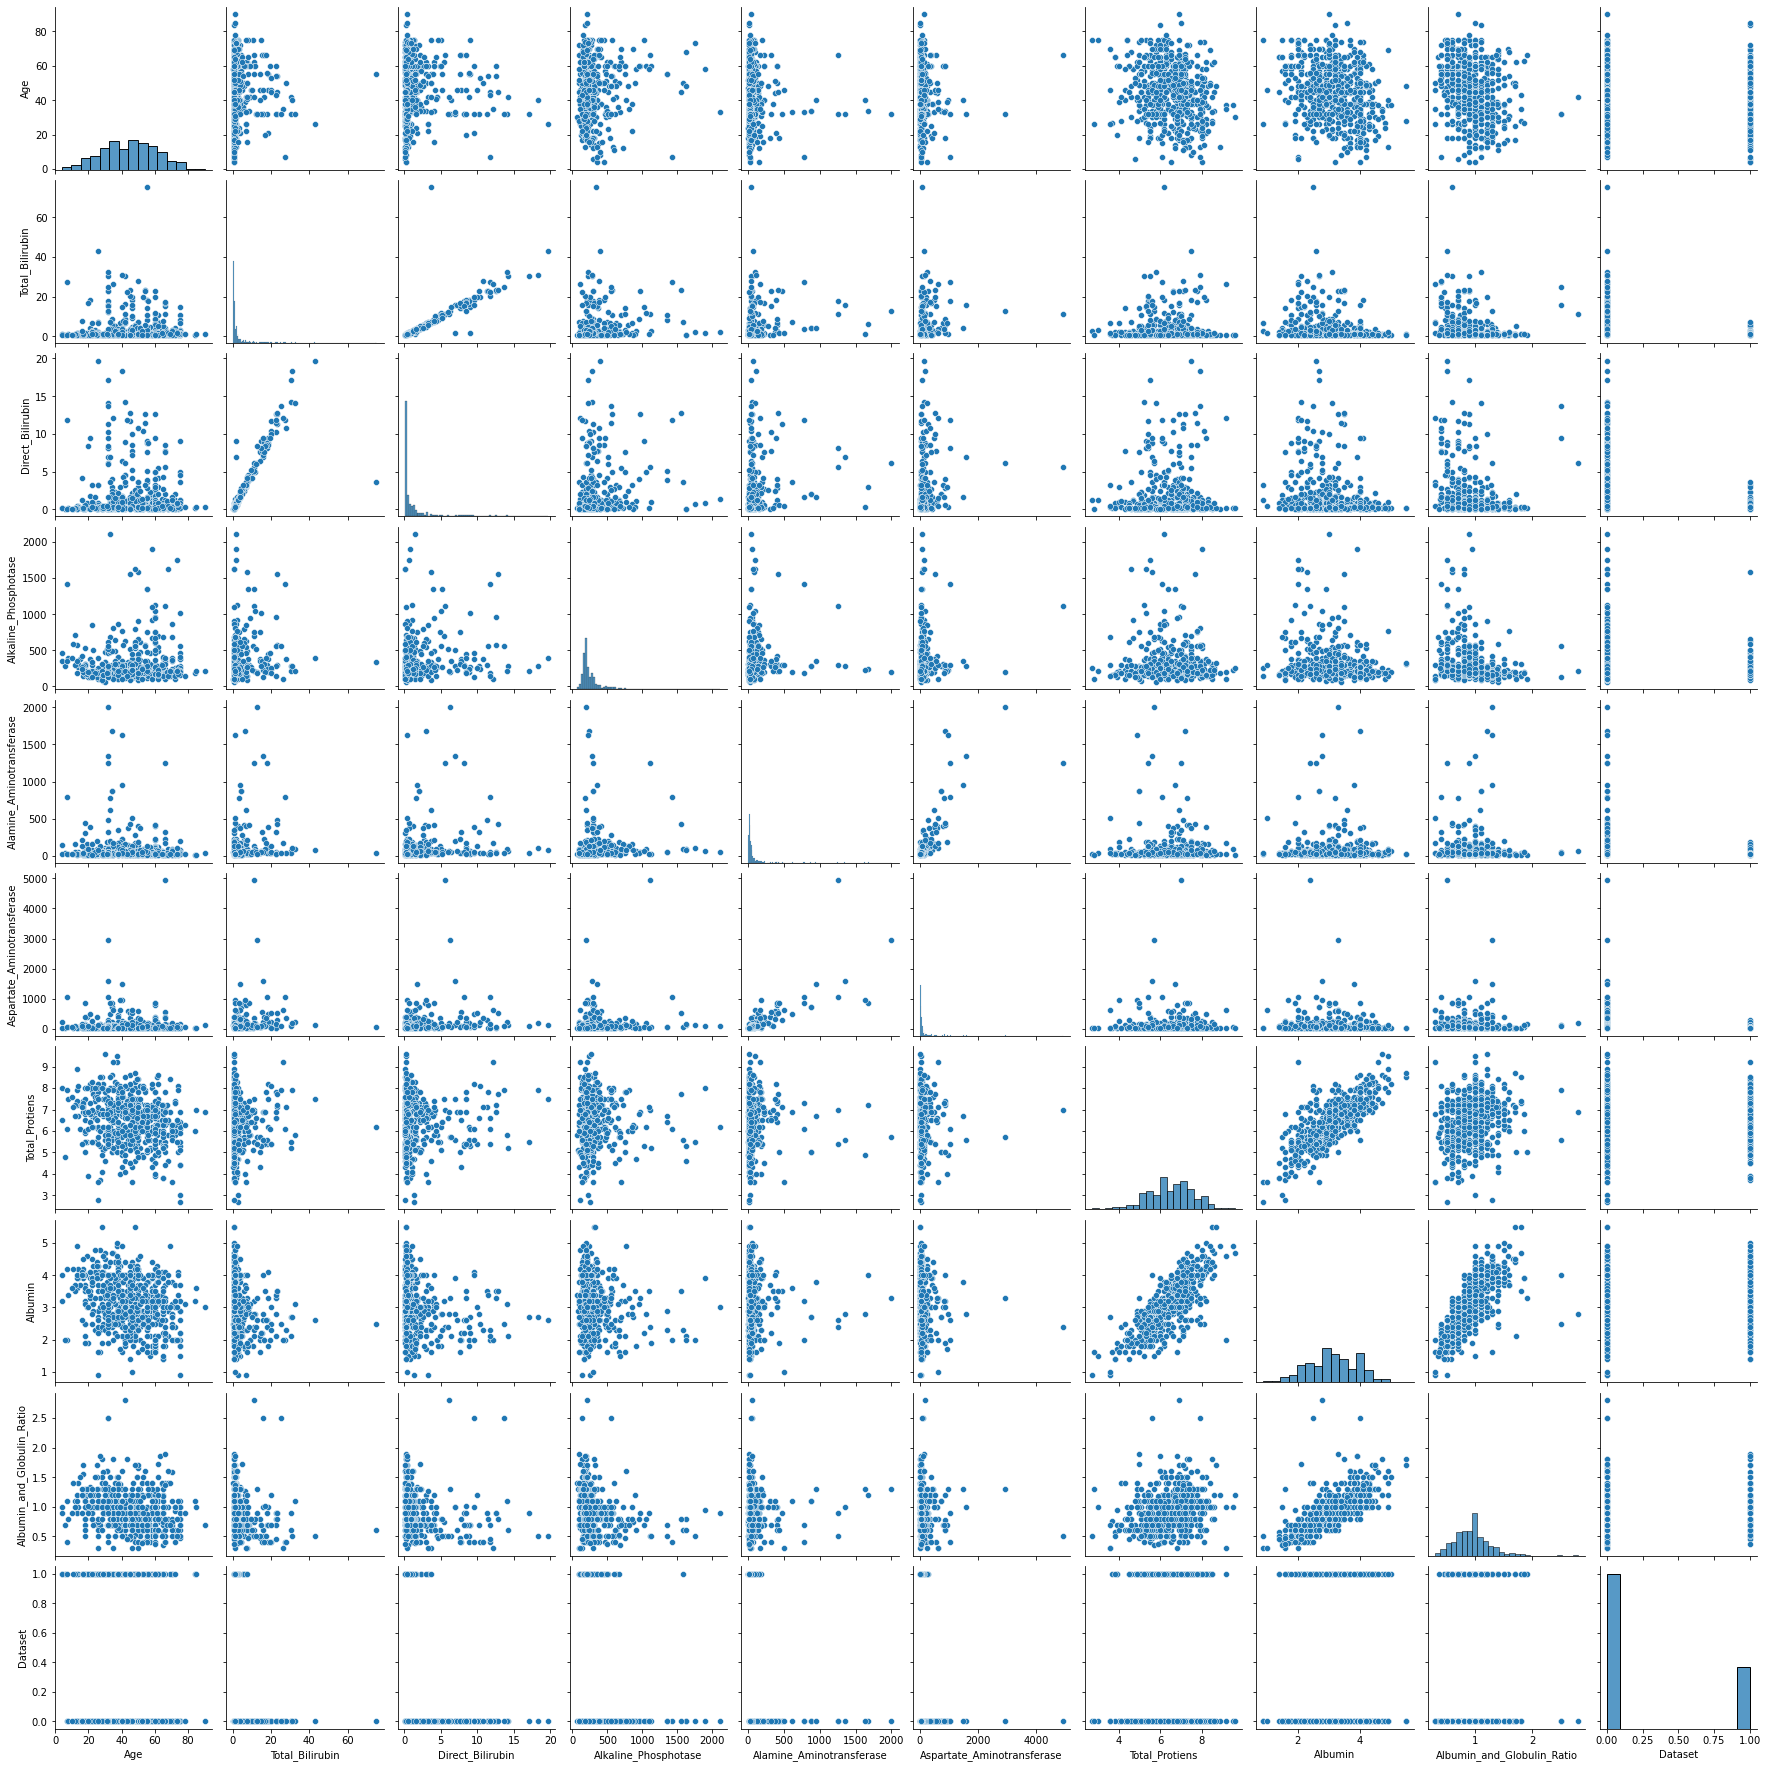

In [33]:
plt.figure(figsize = (9,9))
sns.pairplot(data)
plt.show()

# Correlation Chart

In [34]:
#Correlation chart
X = data.drop(columns = ['Dataset'], axis = 1)
X.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000


# Heat Map of Correlation Chart

<AxesSubplot:>

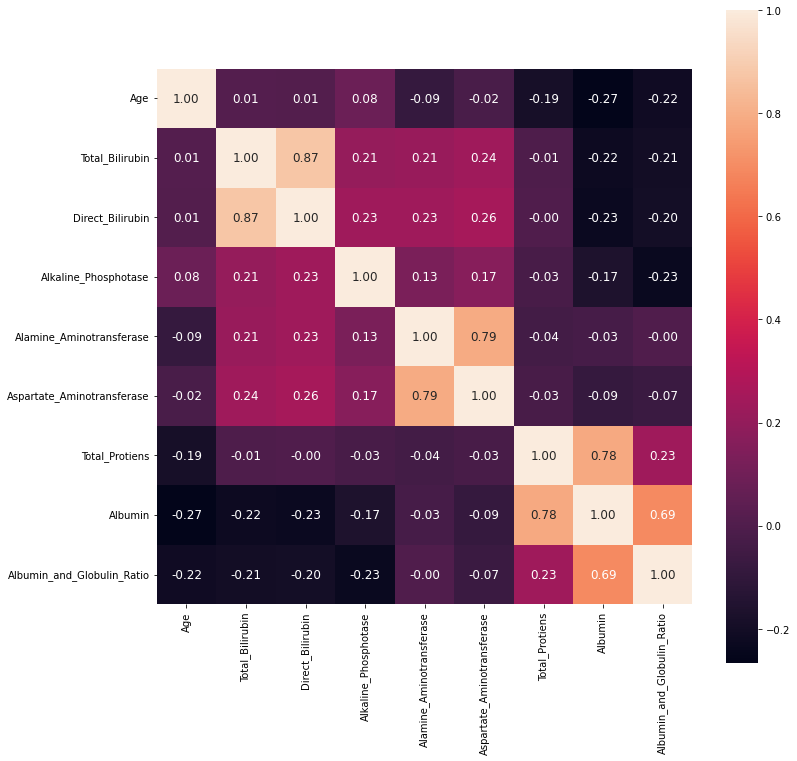

In [35]:
#Mapping the correlation chart
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(), cbar = True,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 12})

# Data Preprocessing 

In [36]:
#filling the null values
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(), inplace = True)

In [37]:
#converting textual data to categorised numerical data
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [38]:
data['Gender']

0      0
1      1
2      1
3      1
4      1
      ..
578    1
579    1
580    1
581    1
582    1
Name: Gender, Length: 583, dtype: int32

In [230]:
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,0
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,0
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,0
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,1
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,0


In [228]:
#splitting the data into x and y
x = data.iloc[:, :10].values
y = data.iloc[:, 10:].values

In [229]:
x

array([[65.  ,  0.  ,  0.7 , ...,  6.8 ,  3.3 ,  0.9 ],
       [62.  ,  1.  , 10.9 , ...,  7.5 ,  3.2 ,  0.74],
       [62.  ,  1.  ,  7.3 , ...,  7.  ,  3.3 ,  0.89],
       ...,
       [52.  ,  1.  ,  0.8 , ...,  6.4 ,  3.2 ,  1.  ],
       [31.  ,  1.  ,  1.3 , ...,  6.8 ,  3.4 ,  1.  ],
       [38.  ,  1.  ,  1.  , ...,  7.3 ,  4.4 ,  1.5 ]])

In [43]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [44]:
x.shape

(583, 10)

In [45]:
y.shape

(583, 1)

# Train Test Split 

In [125]:
#splitting the data into train and testing data 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [126]:
print(x_train.shape)#training input
print(x_test.shape)#testing input
print(y_train.shape)#training output
print(y_test.shape)#testing output

(466, 10)
(117, 10)
(466, 1)
(117, 1)


# Feature Scaling 

In [127]:
# Feature scaling 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Model Building 

# Logistic Regression 

In [128]:
log = LogisticRegression()
log.fit(x_train, y_train)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [129]:
y_pred_lr = log.predict(x_test)
y_pred_lr 

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [130]:
y_test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [131]:
#accuracy  
accuracy_score(y_test, y_pred_lr)

0.7350427350427351

In [132]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

array([[76, 11],
       [20, 10]], dtype=int64)

<AxesSubplot:>

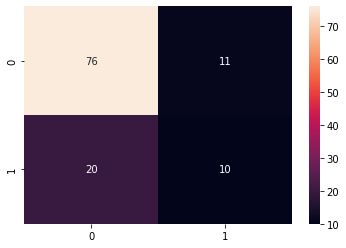

In [133]:
import seaborn as sns
sns.heatmap(cm_lr,annot=True)

In [134]:
fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(y_test, y_pred_lr)
roc_auc = metrics.auc(fpr_lr, tpr_lr)

In [135]:
fpr_lr

array([0.        , 0.12643678, 1.        ])

In [136]:
tpr_lr

array([0.        , 0.33333333, 1.        ])

In [137]:
threshold_lr

array([2, 1, 0], dtype=int64)

Text(0, 0.5, 'fpr_lr')

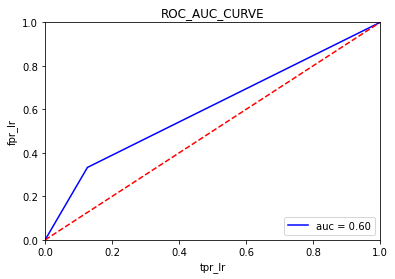

In [138]:
import matplotlib.pyplot as plt
plt.title("ROC_AUC_CURVE")
plt.plot(fpr_lr,tpr_lr, 'b', label = 'auc = %0.2f'%roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr_lr')
plt.ylabel('fpr_lr')

In [139]:
log.predict([[38,1,1.0,0.3,216,21,24,7.3,4.4,1.50]])

array([0], dtype=int64)

# KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
knn.fit(x_train, y_train)

D:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [141]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [142]:
y_test 

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [143]:
accuracy_score(y_test, y_pred_knn)

0.6923076923076923

In [144]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[68, 19],
       [17, 13]], dtype=int64)

<AxesSubplot:>

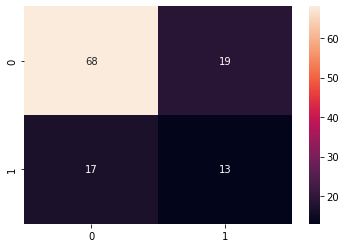

In [145]:
sns.heatmap(cm_knn,annot=True)

In [146]:
import sklearn.metrics as metrics 
fpr_knn, tpr_knn, threshold_knn= metrics.roc_curve(y_test, y_pred_knn)
roc_auc = metrics.auc(fpr_knn, tpr_knn)

In [147]:
fpr_knn

array([0.       , 0.2183908, 1.       ])

In [148]:
tpr_knn

array([0.        , 0.43333333, 1.        ])

In [149]:
threshold_knn

array([2, 1, 0], dtype=int64)

Text(0, 0.5, 'fpr_knn')

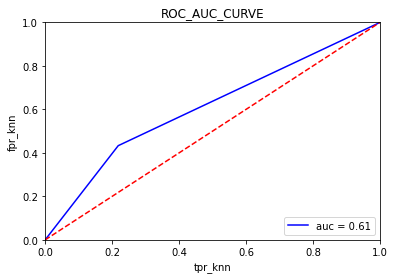

In [150]:
import matplotlib.pyplot as plt
plt.title("ROC_AUC_CURVE")
plt.plot(fpr_knn,tpr_knn, 'b', label = 'auc = %0.2f'%roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr_knn')
plt.ylabel('fpr_knn')

In [151]:
log.predict([[38,1,1.0,0.3,216,21,24,7.3,4.4,1.50]])

array([0], dtype=int64)

# SVM 

In [152]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear")
svm.fit(x_train, y_train)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [153]:
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [154]:
y_test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [155]:
accuracy_score(y_test, y_pred_svm)

0.7435897435897436

In [156]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_svm

array([[87,  0],
       [30,  0]], dtype=int64)

<AxesSubplot:>

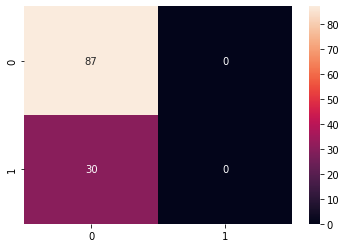

In [157]:
sns.heatmap(cm_svm,annot=True)

In [158]:
fpr_svm, tpr_svm, threshold_svm = metrics.roc_curve(y_test, y_pred_svm)
roc_auc = metrics.auc(fpr_svm, tpr_svm)

In [159]:
fpr_svm

array([0., 1.])

In [160]:
tpr_svm

array([0., 1.])

In [161]:
threshold_svm

array([1, 0], dtype=int64)

Text(0, 0.5, 'fpr_svm')

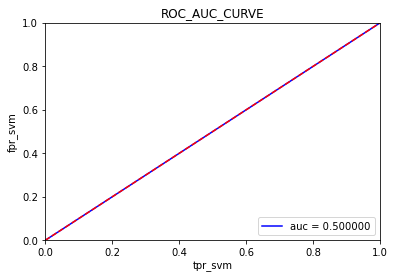

In [162]:
import matplotlib.pyplot as plt
plt.title("ROC_AUC_CURVE")
plt.plot(fpr_svm,tpr_svm, 'b', label = 'auc = %f'%roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr_svm')
plt.ylabel('fpr_svm')

In [163]:
svm.predict([[38,1,1.0,0.3,216,21,24,7.3,4.4,1.50]])

array([0], dtype=int64)

# Naive Bayes 

In [164]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [165]:
y_pred_nb = nb.predict(x_test)
y_pred_nb

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [166]:
y_test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [167]:
accuracy_score(y_test, y_pred_nb)

0.5641025641025641

In [168]:
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_test, y_pred_nb)
roc_auc = metrics.auc(fpr_nb, tpr_nb)

In [169]:
fpr_nb

array([0.       , 0.5862069, 1.       ])

In [170]:
tpr_nb

array([0., 1., 1.])

In [171]:
threshold_nb

array([2, 1, 0], dtype=int64)

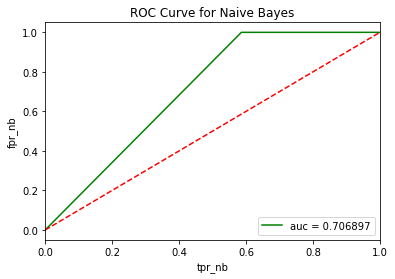

In [172]:
plt.title("ROC Curve for Naive Bayes")
plt.plot(fpr_nb, tpr_nb, 'g', label = 'auc = %f'%roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim(0,1)
plt.xlabel('tpr_nb')
plt.ylabel('fpr_nb')
plt.legend(loc = 'lower right')

In [173]:
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_nb

array([[36, 51],
       [ 0, 30]], dtype=int64)

<AxesSubplot:>

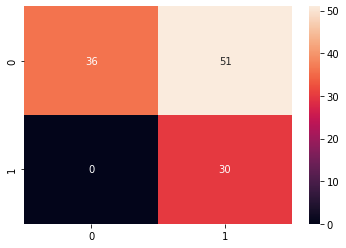

In [174]:
sns.heatmap(cm_nb,annot=True)

In [175]:
nb.predict([[38,1,1.0,0.3,216,21,24,7.3,4.4,1.50]])

array([0], dtype=int64)

# Decision Tree Classification 

In [215]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [216]:
dtc.score(x_test, y_test)

0.5897435897435898

In [217]:
y_pred_dtc = dtc.predict(x_test)
y_pred_dtc

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [179]:
y_test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [180]:
cm_dtc= confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[48, 39],
       [ 9, 21]], dtype=int64)

<AxesSubplot:>

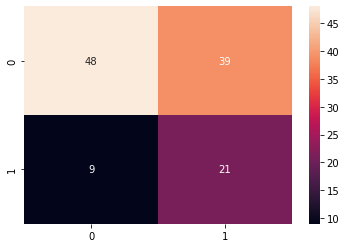

In [181]:
sns.heatmap(cm_dtc , annot = True)

In [182]:
fpr_dtc, tpr_dtc, threshold_dtc = metrics.roc_curve(y_test, y_pred_dtc)
roc_auc = metrics.auc(fpr_dtc, tpr_dtc)

In [183]:
fpr_dtc

array([0.        , 0.44827586, 1.        ])

In [184]:
tpr_dtc

array([0. , 0.7, 1. ])

In [185]:
threshold_dtc

array([2, 1, 0], dtype=int64)

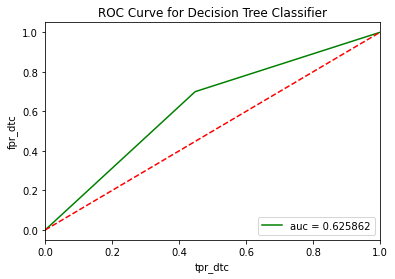

In [186]:
plt.title("ROC Curve for Decision Tree Classifier")
plt.plot(fpr_dtc, tpr_dtc, 'g', label = 'auc = %f'%roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim(0,1)
plt.xlabel('tpr_dtc')
plt.ylabel('fpr_dtc')
plt.legend(loc = 'lower right')

In [187]:
dtc.predict([[38,1,1.0,0.3,216,21,24,7.3,4.4,1.50]])

array([0], dtype=int64)

# Random Forest Classification

In [206]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
rfc.fit(x_train, y_train)

C:\Users\UPAMAN~1\AppData\Local\Temp/ipykernel_8208/61270414.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [207]:
y_pred_rfc = rfc.predict(x_test)
y_pred_rfc

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [208]:
y_test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [209]:
#checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_rfc)

0.7350427350427351

In [210]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_rfc

array([[72, 15],
       [16, 14]], dtype=int64)

<AxesSubplot:>

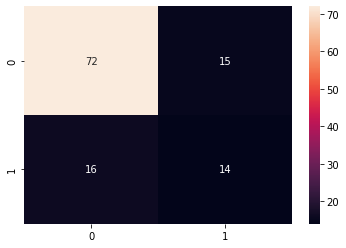

In [211]:
sns.heatmap(cm_rfc, annot = True)

In [205]:
fpr_rfc, tpr_rfc, threshold_rf = metrics.roc_curve(y_test, y_pred_rfc)
roc_auc = metrics.auc(fpr_rfc, tpr_rfc)

In [195]:
fpr_rfc

array([0.        , 0.17241379, 1.        ])

In [196]:
tpr_rfc

array([0.        , 0.46666667, 1.        ])

Text(0, 0.5, 'fpr_rfc')

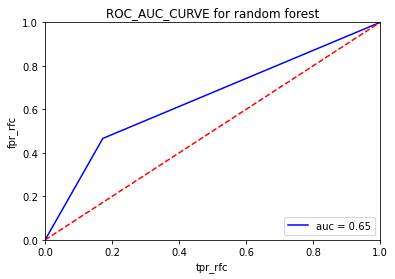

In [197]:
plt.title("ROC_AUC_CURVE for random forest")
plt.plot(fpr_rfc,tpr_rfc, 'b', label = 'auc = %0.2f'%roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr_rfc')
plt.ylabel('fpr_rfc')

In [220]:
log.score(x_test, y_test)

0.7350427350427351

In [222]:
svm.score(x_test, y_test)

0.7435897435897436

In [223]:
knn.score(x_test, y_test)

0.6923076923076923

In [224]:
dtc.score(x_test, y_test)

0.5897435897435898

In [225]:
rfc.score(x_test, y_test)

0.7350427350427351

In [226]:
nb.score(x_test, y_test)

0.5641025641025641

# Model Pickling

In [243]:
#Randomm Forest Classification is the model with the best accuracy 
#pickling the support vector machine model 

import pickle 
pickle.dump(rfc,open('model_rfc.pkl','wb'))